# tensorflow 实现逻辑回归

![image-20210319103203888](https://i.loli.net/2021/03/19/UdJL5qDk68uBobO.png)

In [1]:
import tensorflow as tf
import numpy as np

### sigmoid function

In [2]:
x = np.array([1,2,3,4])
w = tf.Variable(1.)
b = tf.Variable(1.)

1/(1+tf.exp(-(w*x+b)))

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.880797  , 0.95257413, 0.98201376, 0.9933072 ], dtype=float32)>

### cross entropy function

<img src="https://i.loli.net/2021/03/19/Ia3ocPMR41qtLpE.png" alt="image-20210319103839859" style="zoom:50%;" />

In [3]:
y = np.array([0,0,1,1])
pred = np.array([0.1,0.2,0.8,0.49])

In [4]:
# cross entropy
-tf.reduce_sum(y*tf.math.log(pred)+(1-y)*tf.math.log(1-pred))

<tf.Tensor: shape=(), dtype=float64, numpy=1.2649975061637104>

In [5]:
# average cross entropy
-tf.reduce_mean(y*tf.math.log(pred)+(1-y)*tf.math.log(1-pred))

<tf.Tensor: shape=(), dtype=float64, numpy=0.3162493765409276>

### 准确率

- 假定threshold = 0.4
    - pred >  0.4 => class 1
    - pred <= 0.4 => class 0
    
<hr>

```python
tf.where(condition,a,b)
```

- if `condition`, then return `a`, else `b`

<hr>

In [7]:
a = tf.where(pred <= 0.4,0,1)
a

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 1, 1], dtype=int32)>

In [9]:
b = tf.equal(y,a)
b

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

In [10]:
c = tf. cast(b,tf.float32)
c

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [14]:
accuracy = tf.reduce_mean(c)
accuracy.numpy()

1.0

# 实例：房屋类别分类
<img src="https://i.loli.net/2021/03/19/mI9YxznC2PESVit.png" alt="image-20210319105157536" style="zoom:50%;" />

1） 加载数据

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x= np. array([137.97,  104.50,  100.00,  124.32,  79.20,  99.00,  124.00, 
               114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y = np.array([1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0])

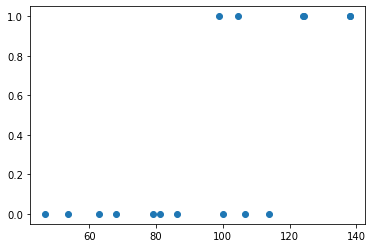

In [20]:
plt.scatter(x,y)

2) data preprocessing

In [21]:
x_train = x - np.mean(x) #centralization
y_train = y

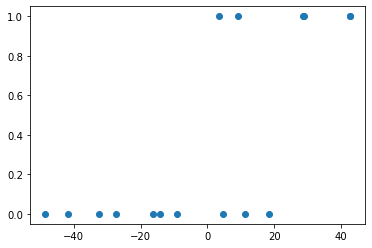

In [22]:
plt.scatter(x_train,y_train)

3) 设置hyperparameters

In [23]:
learn_rate = 0.005
iter = 5

display_step = 1

4) model initialization

In [25]:
np.random.seed(612)
w=tf. Variable (np. random. randn())
b=tf. Variable (np. random. randn())

5) train model

In [26]:
cross_train = []
acc_train = []

for i in range(iter+1):
    with tf.GradientTape() as tape:
        pred_train = 1/(1+tf.exp(-(w*x_train+b)))
        Loss_train = -tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
        Accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train<0.5,0,1),y_train),tf.float32))
        
    cross_train.append(Loss_train)
    acc_train.append(Accuracy_train)
    
    dl_dw,dl_db = tape.gradient(Loss_train,[w,b])
    
    w.assign_sub(learn_rate*dl_dw)
    b.assign_sub(learn_rate*dl_db)
    
    if i % display_step == 0:
        print(f'i: {i}, Train Loss: {Loss_train}, Accuracy: {Accuracy_train}')

i: 0, Train Loss: 0.850438117980957, Accuracy: 0.625
i: 1, Train Loss: 0.4075981378555298, Accuracy: 0.875
i: 2, Train Loss: 0.34572893381118774, Accuracy: 0.8125
i: 3, Train Loss: 0.3257567882537842, Accuracy: 0.8125
i: 4, Train Loss: 0.3167256712913513, Accuracy: 0.8125
i: 5, Train Loss: 0.31195974349975586, Accuracy: 0.8125
